<a href="https://colab.research.google.com/github/chaeminsoo/boostcamp_ai_tech_RecSys/blob/main/pytorch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensor ve Parameter

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BoostcampAITech/lecture-note-python-basics-for-ai/blob/main/codes/pytorch/07_torch-study/autograd_and_optimizer.ipynb)

In [2]:
import torch
from torch import nn
from torch import Tensor


In [3]:
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = nn.Parameter(
                torch.randn(in_features, out_features))
        
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

In [4]:
x = torch.randn(5, 7) # 데이터가 5개 피처가 7개

In [5]:
x

tensor([[ 0.2979, -0.3466, -0.2035, -1.3492,  0.1983,  0.3070, -0.4145],
        [-1.7926,  0.2922, -1.4049,  0.2044,  1.8022,  1.0958, -0.2031],
        [-0.6443, -1.5590, -0.2039, -0.3167,  0.7361, -0.6720,  0.2745],
        [-1.4062,  0.8538, -0.2221,  0.7283, -0.7352,  1.7294, -1.0445],
        [ 0.6542, -0.6157,  0.4630,  0.7790, -0.2415, -0.1630,  1.3742]])

In [6]:
layer = MyLiner(7, 12) # 피처가 12개고 데이터가 5개 인것으로 바꾼다
layer(x).shape

torch.Size([5, 12])

In [7]:
for value in layer.parameters():
    print(value)

Parameter containing:
tensor([[ 0.1385,  0.3646, -0.4760,  1.7120, -0.2183, -2.2956, -0.8972, -3.7296,
          0.0431, -1.2319, -0.7483, -0.4511],
        [-3.4815,  0.0243,  1.4467, -0.6774,  0.8195, -1.0126,  1.8665,  0.4535,
         -1.6475,  0.5674, -0.6226, -0.7797],
        [ 0.3907, -0.6592, -0.6256, -0.4991,  0.5354,  1.6129, -0.2756, -0.0518,
         -0.1354, -0.6626,  0.3600, -1.0059],
        [-0.3798, -0.6648, -0.5053,  0.0853,  0.7127,  0.2019, -2.6615, -0.7533,
         -0.8616, -1.1468,  0.3612,  0.8098],
        [ 0.3069,  1.1770,  0.7894, -1.7121,  0.3207,  1.3272, -1.5812,  0.1045,
         -0.0078, -0.8288, -0.5420, -0.5301],
        [ 0.1900, -0.3330,  0.6672,  0.2696,  0.7713, -0.8516, -0.9969,  1.9930,
          2.5018,  0.3577,  2.5743, -0.0329],
        [ 0.1055, -0.2236, -1.4014, -1.0200, -0.0295, -1.0649, -0.4549, -1.8797,
          0.2309,  0.3897,  1.0403,  0.3038]], requires_grad=True)
Parameter containing:
tensor([-0.8774, -0.7467, -0.3821,  0.0569,  0

parameters는 gradiant의 대상이 된다 (requires_grad=True)

backwward 때 미분이 일어남

 아래의 코드는 nn.Parameter를 이용하지 않고 Tensor로 선언한 경우이다


In [8]:
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = Tensor(
                torch.randn(in_features, out_features))
        
        self.bias = Tensor(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias


layer = MyLiner(7, 12)
print(layer(x))
print()
print(layer(x).shape)

tensor([[-0.7560,  0.6116, -0.0259,  0.5844, -1.2217,  0.8945, -2.6959, -2.1410,
          1.1443,  2.0769, -0.7881,  0.0423],
        [-2.5800,  1.0005, -1.0566,  0.2104,  1.6498, -3.0983,  5.0600, -0.7332,
         -2.4014,  4.0442, -1.5830, -4.5391],
        [-1.4124,  2.2745, -0.4219, -0.0619,  4.5408, -1.8246,  0.4703, -1.7641,
          1.9090,  2.5025,  4.4196,  0.6721],
        [ 2.1947, -4.4609,  1.7449, -2.7096, -0.9825,  0.8620,  5.1858, -0.5452,
          0.4297,  2.1711, -8.6450, -0.5598],
        [ 1.3655,  3.4207, -1.1669,  0.1025,  3.2206,  1.2189, -0.4571, -0.4481,
          2.7177,  1.7500,  0.0900,  4.8837]])

torch.Size([5, 12])


In [9]:
for value in layer.parameters():
    print(value)

parameters를 해도 아무것도 나오지 않는다.

Tensor로 해서 backward의 대상이 되는게 없기 때문이다.

## AutoGrad for Linear Regression
https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

$$ y=2x+1 $$

In [10]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [11]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [12]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [13]:
import torch
from torch.autograd import Variable
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize) # torch.nn.Linear: Xw+b를 pytorch 내부에서 이미 구현해준 모델

    def forward(self, x):
        out = self.linear(x)
        return out

In [14]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = LinearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [15]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [16]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(92.8347, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 0, loss 92.8347396850586
tensor(7.5991, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 1, loss 7.599100589752197
tensor(0.6464, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 2, loss 0.6463988423347473
tensor(0.0790, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 3, loss 0.07899254560470581
tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 4, loss 0.032417602837085724
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 5, loss 0.028328683227300644
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 6, loss 0.027708372101187706
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 7, loss 0.027374116703867912
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 8, loss 0.027066443115472794
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 9, loss 0.026764046400785446
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>)

In [17]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)


[[ 0.8164005]
 [ 2.8428404]
 [ 4.8692803]
 [ 6.8957205]
 [ 8.92216  ]
 [10.9486   ]
 [12.97504  ]
 [15.00148  ]
 [17.02792  ]
 [19.05436  ]
 [21.0808   ]]


In [18]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [19]:
for p in model.parameters():
    if p.requires_grad: 
         print(p.name, p.data)

None tensor([[2.0264]], device='cuda:0')
None tensor([0.8164], device='cuda:0')


## Logistic Regression

In [20]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## print out the pytorch version used (1.31 at the time of this tutorial)
print(torch.__version__)

1.12.1+cu113


In [21]:
## configuration to detect cuda or cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

cuda:0


In [22]:
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [23]:
import urllib
import os
import shutil
from zipfile import ZipFile


urllib.request .urlretrieve(DATA_PATH, "hymenoptera_data.zip")



with ZipFile("hymenoptera_data.zip", 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

os.rename("hymenoptera_data", "data")


In [24]:
## configure root folder on your gdrive
data_dir = "./data"

## custom transformer to flatten the image tensors
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        result = torch.reshape(img, self.new_size)
        return result

## transformations used to standardize and normalize the datasets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
}

## load the correspoding folders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

## load the entire dataset; we are not using minibatches here
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size=len(image_datasets['train']),
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                           batch_size=len(image_datasets['val']),
                                           shuffle=True)

Dimension of image: torch.Size([244, 150528]) 
 Dimension of labels torch.Size([244])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  if __name__ == '__main__':


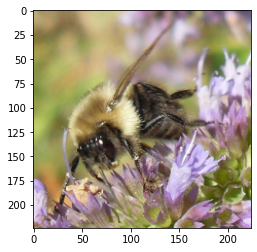

In [25]:
## load the entire dataset
x, y = next(iter(train_dataset))

## print one example
dim = x.shape[1]
print("Dimension of image:", x.shape, "\n", 
      "Dimension of labels", y.shape)

plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())

In [26]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        # intialize parameters
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {"dw": torch.zeros(dim, 1, dtype=torch.float).to(device),
                      "db": torch.scalar_tensor(0).to(device)}
        self.lr = lr.to(device)

    def forward(self, x):
        ## compute forward
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a

    def sigmoid(self, z):
        return 1/(1 + torch.exp(-z))

    def backward(self, x, yhat, y):
        ## compute backward
        self.grads["dw"] = (1/x.shape[1]) * torch.mm(x, (yhat - y).T)
        self.grads["db"] = (1/x.shape[1]) * torch.sum(yhat - y)
    
    def optimize(self):
        ## optimization step
        self.w = self.w - self.lr * self.grads["dw"]
        self.b = self.b - self.lr * self.grads["db"]

## utility functions
def loss(yhat, y):
    m = y.size()[1]
    return -(1/m)* torch.sum(y*torch.log(yhat) + (1 - y)* torch.log(1-yhat))

def predict(yhat, y):
    y_prediction = torch.zeros(1, y.size()[1])
    for i in range(yhat.size()[1]):
        if yhat[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

In [27]:
## model pretesting
x, y = next(iter(train_dataset))

## flatten/transform the data
x_flatten = x.T
y = y.unsqueeze(0) 

## num_px is the dimension of the images
dim = x_flatten.shape[0]

## model instance
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

## calculate loss
cost = loss(yhat, y)
prediction = predict(yhat, y)
print("Cost: ", cost)
print("Accuracy: ", prediction)

## backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost:  tensor(0.6931)
Accuracy:  tensor(50.4098)


In [28]:
## hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform the data
def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0) 
    return x_flatten, y 

## training the model
for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x, y)
    test_x, test_y = transform_data(test_x, test_y)

    # forward
    yhat = lrmodel.forward(x.to(device))
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat, y)
        
    # backward
    lrmodel.backward(x.to(device), 
                    yhat.to(device), 
                    y.to(device))
    lrmodel.optimize()
    ## test
    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)

    if i % 10 == 0:
        costs.append(cost)

    if i % 10 == 0:
        print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i, 
                                                                                    cost, 
                                                                                    train_pred,
                                                                                    test_pred))


Cost after iteration 0: 0.6931472420692444 | Train Acc: 50.40983581542969 | Test Acc: 45.75163269042969
Cost after iteration 10: 0.6691470742225647 | Train Acc: 64.3442611694336 | Test Acc: 54.24836730957031
Cost after iteration 20: 0.6513182520866394 | Train Acc: 68.44261932373047 | Test Acc: 54.24836730957031
Cost after iteration 30: 0.6367825269699097 | Train Acc: 68.03278350830078 | Test Acc: 54.24836730957031
Cost after iteration 40: 0.6245337128639221 | Train Acc: 69.67213439941406 | Test Acc: 54.90196228027344
Cost after iteration 50: 0.6139225363731384 | Train Acc: 70.90164184570312 | Test Acc: 56.20914840698242
Cost after iteration 60: 0.6045235991477966 | Train Acc: 72.54098510742188 | Test Acc: 56.86274337768555
Cost after iteration 70: 0.5960511565208435 | Train Acc: 74.18032836914062 | Test Acc: 57.51633834838867
Cost after iteration 80: 0.5883085131645203 | Train Acc: 73.77049255371094 | Test Acc: 57.51633834838867
Cost after iteration 90: 0.5811557173728943 | Train Acc: 

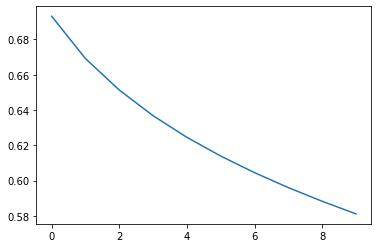

In [29]:

## the trend in the context of loss
plt.plot(costs)
plt.show()